Decision Trees is a Supervised Learning Algorithm

Decision Trees can be used for both Classification & Regression Tasks

Two types of Decision Trees:
**Classification Decision Tree** and **Regression Decision Tree**

**Classification Decision Tree** -> The decision variable is categorical

**Regression Decision Tree**  -> The decision variable is continuous

**Gini Index** --> It is the name of the cost function that is used to evaluate the binary splits in the dataset

**Gini index** = **0**  (Good)  
**Gini index** = **0.5(for 2 class problem)** (worst)

Gini index for the subnodes is calculated by using the formula:  p^2 + q^2  
It is sum of the square of probability of success and failure.  


* **Split Creation:** A split is nothing but including an attribute in the dataset and the value.  
* A split can be created in the dataset with the help of following three parts-  
* **Part 1: Calculating Gini Score**  
* **Part 2: Splitting a Dataset:**  
* It is nothing but splitting the dataset into two lists of rows having index of the attribute and split value of the attribute.  
* The two groups - right and left from the dataset are being collected.  
* The value of a split can be calculated by finding the Gini score.  
* Split value will reside in which group the attribute will reside.
* **Part 3: Evaluating all splits**  
* After finding gini score and splitting dataset, we need to evaluate all the splits.  
* We must check every value associated with each attribute as a candidate split.  
* One should find the best possible split by evaluating the cost of split.  
* The best split will be used as a node in the decision tree.  


# Android Malware Detection System

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Datasets/train_malware.csv')

In [4]:
data

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(398, 331)

In [13]:
data = data.sample(frac=1).reset_index(drop=True)

In [14]:
data.head()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
import seaborn as sns

<AxesSubplot:xlabel='type', ylabel='count'>

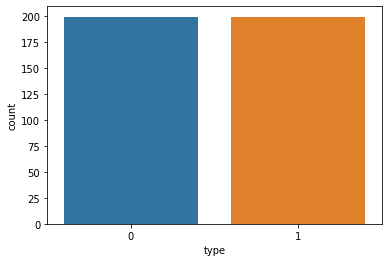

In [18]:
sns.countplot(x='type', data = data)

In [19]:
target_count = data.type.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

Class 0: 199
Class 1: 199


In [20]:
count_class_0, count_class_1 = data.type.value_counts()

In [21]:
df_class_0 = data[data['type'] == 0]
df_class_1 = data[data['type'] == 1]

In [23]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

In [24]:
df_test_over.shape

(398, 331)

<AxesSubplot:xlabel='type', ylabel='count'>

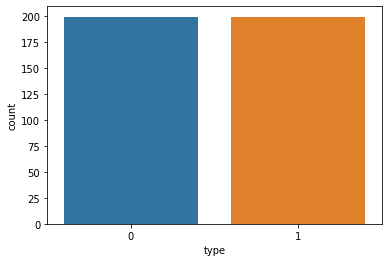

In [25]:
sns.countplot(x='type', data=df_test_over)

In [26]:
X = df_test_over.iloc[:, df_test_over.columns != 'type']
Y = df_test_over.iloc[:, df_test_over.columns == 'type']

In [27]:
X.head()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
Y.head()

,type
0,0
3,0
5,0
7,0
8,0


In [29]:
from sklearn.utils import shuffle

In [110]:
X, Y = shuffle(X, Y)

In [31]:
X.head()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
Y.head()

,type
50,1
397,0
34,1
53,1
158,1


In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [36]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores.nlargest(10, 'Score')

,Specs,Score
190,android.permission.READ_PHONE_STATE,135.425339
195,android.permission.READ_SMS,107.520325
277,android.permission.WRITE_SMS,103.037383
26,android.permission.ACCESS_WIFI_STATE,67.638037
225,android.permission.SEND_SMS,55.537313
22,android.permission.ACCESS_NETWORK_STATE,55.334728
9,android.permission.ACCESS_COARSE_LOCATION,49.191489
91,android.permission.CHANGE_WIFI_STATE,48.268817
208,android.permission.RECEIVE_SMS,46.538462
134,android.permission.INSTALL_PACKAGES,45.081633


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.63498152e-04
 0.00000000e+00 2.50793434e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.81428009e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.61318739e-03 3.13521749e-03
 0.00000000e+00 0.00000000e+00 4.20977266e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.39595701e-02 1.35603821e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.88100786e-03
 0.00000000e+00 1.61443638e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.56781199e-03
 1.53369921e-03 0.000000

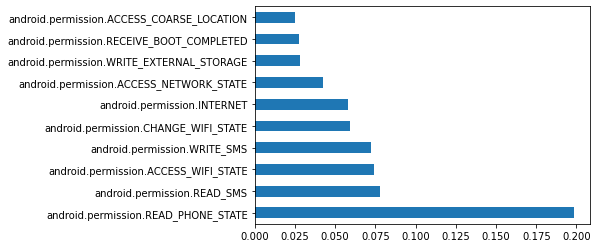

In [71]:
from  sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
# plot graph of feature_importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [73]:
X_train.shape

(318, 330)

In [64]:
X_train.head()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y_train.head()

,type
245,1
119,1
286,1
377,1
273,0


In [56]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [57]:
from sklearn import svm
support = svm.LinearSVC(random_state=20)

In [74]:
support.fit(X_train, y_train)

LinearSVC(random_state=20)

In [99]:
y_pred = support.predict(X_test)

In [100]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [101]:
model_1_accuracy = metrics.accuracy_score(y_test, y_pred)
print(model_1_accuracy)

0.95


In [91]:
cnf_matrix = confusion_matrix(y_test, y_pred)

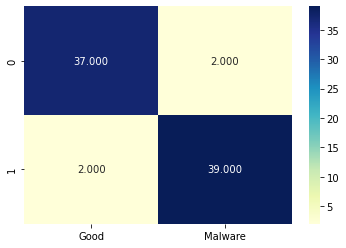

In [92]:
labels = ['Good', 'Malware']
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",  fmt=".3f", xticklabels=labels)
plt.show()

# Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
tree = DecisionTreeClassifier()

In [113]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [114]:
y_pred = tree.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [115]:
model_2_accuracy = metrics.accuracy_score(y_test, y_pred)
print(model_2_accuracy)

0.95


In [116]:
cnf_matrix_2 = confusion_matrix(y_test, y_pred)

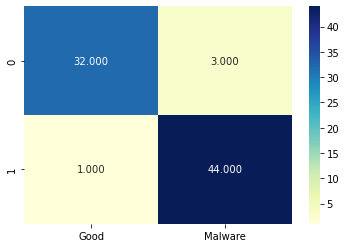

In [117]:
labels = ['Good', 'Malware']
sns.heatmap(cnf_matrix_2, annot=True, cmap="YlGnBu",  fmt=".3f", xticklabels=labels)
plt.show()